In [1]:
%autosave 2

Autosaving every 2 seconds


In [2]:
import torch

In [3]:
def sigmoid_activation(x):
    """
    Arguments:
    ----------
    x: torch.Tensor
    """
    return 1/(1+torch.exp(-x))

## For single layer

In [4]:
torch.manual_seed(7)

# features are 5 random normal variables
features = torch.randn((1, 5))
print('features:\n', features)
# Same as features' dimension
weights = torch.rand_like(features)
print('weights:\n', weights)
# Bias term
bias = torch.rand((1,1))
print('bias:\n', bias)

features:
 tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
weights:
 tensor([[0.2868, 0.2063, 0.4451, 0.3593, 0.7204]])
bias:
 tensor([[0.0731]])


In [5]:
wi_xi = torch.sum(features * weights)
# This can also be used
# wi_xi = (features * weights).sum()
y_hat = sigmoid_activation(wi_xi + bias)

In [6]:
y_hat

tensor([[0.8072]])

## For multiple layer

In [7]:
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [8]:
features2 = sigmoid_activation(torch.mm(features, W1) + B1)
y_hat = sigmoid_activation(torch.mm(features2, W2) + B2)
y_hat

tensor([[0.3171]])

## Handwritten digit recognizer

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

# import helper

import matplotlib.pyplot as plt

In [12]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100.1%

Extracting C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw


113.5%

Extracting C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw


100.4%

Extracting C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw


180.4%

Extracting C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\rayhan/.pytorch/MNIST_data/MNIST\raw
Processing...
Done!


In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


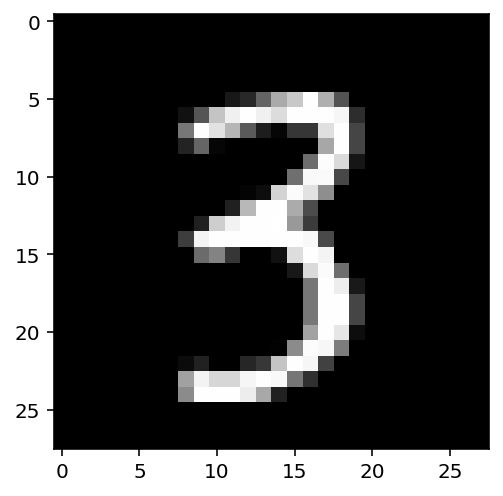

In [16]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [22]:
inputs = images.view(images.shape[0], -1)

hidden_units = 256
size, input_units = inputs.shape
output_units = 10

w1 = torch.randn(input_units, hidden_units)
# b1 = torch.randn(1, hidden_units)
b1 = torch.randn(hidden_units)

w2 = torch.randn(hidden_units, output_units)
# b2 = torch.randn(1, output_units)
b2 = torch.randn(output_units)

h = sigmoid_activation(torch.mm(inputs, w1) + b1)
output = sigmoid_activation(torch.mm(h, w2) + b2)

output.shape

torch.Size([64, 10])

In [46]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [48]:
probabilities = softmax(output)
print(probabilities.shape)
# Check for each image that if the summation of all the 10 probabilities is equal to 1
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with PyTorch (OOP style):

In [49]:
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(in_features=784, out_features=256)
        self.output = nn.Linear(in_features=256, out_features=10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.siftmax(x)
        return x


### Another way of building neural network

In [51]:
from torch import nn
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden = nn.Linear(in_features=784, out_features=256)
        self.output = nn.Linear(in_features=256, out_features=10)
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x))
        return x

model = NeuralNetwork()
model

NeuralNetwork(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

### Activation Functions
So far we've only been looking at the softmax activation, but in general any function can be used as an activation function. The only requirement is that for a network to approximate a non-linear function, **the activation functions must be non-linear**. A few more examples of common activation functions: **Tanh (hyperbolic tangent), and ReLU (rectified linear unit)**. In practice, the **ReLU function is used almost exclusively as the activation function for hidden layers**.

In [52]:
from torch import nn
import torch.nn.functional as F


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(in_features=784, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc_output = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc_output(x))
        return x

model = NeuralNetwork()
model

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc_output): Linear(in_features=64, out_features=10, bias=True)
)

## Building neural network using nn.Sequential